In [ ]:


import os
from tqdm import tqdm
import pickle
import scipy
import sys
import pandas as pd
import numpy as np
import IPython
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import librosa #Python package for music & audio files
import librosa.display
import librosa.display as lplt
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import librosa
import librosa.display
import librosa.display as lplt
from IPython.display import Audio
import IPython
import sklearn

In [ ]:
import os
general_path = '/content/drive/MyDrive/musicdata/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['pop', 'hiphop', 'jazz', 'metal', 'reggae', 'disco', 'blues', 'rock', 'country', 'classical']


In [ ]:
# Importing 1 file
y, sr = librosa.load(f'{general_path}/genres_original/reggae/reggae.00036.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)



y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [ ]:
#/content/drive/MyDrive/musicdata/Data/genres_original/classical/classical.00035.wav
import os
#audio file
audio = '/content/drive/MyDrive/musicdata/Data/genres_original/classical/classical.00035.wav'
#Load & decode the audio as a time series, where sr represents the sampling rate
data , sr = librosa.load(audio)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:

for i in (os.listdir('/content/drive/MyDrive/musicdata/Data/genres_original')):
  print(i)


pop
hiphop
jazz
metal
reggae
disco
blues
rock
country
classical


In [ ]:
#/content/drive/MyDrive/musicdata/Data/genres_original/blues/blues.00000.wav
import random
!pip install pydub


In [ ]:
import glob

# Example: Loading audio files ending with ".wav"
audio_files = glob.glob('data/*.wav')
audio_files

[]

In [ ]:
from pydub import AudioSegment
from pydub.playback import play

In [ ]:
import os
import random
from pydub import AudioSegment
from IPython.display import Audio

def view_random_song(genre):
    filepath = "/content/drive/MyDrive/musicdata/Data/genres_original" + "/" + genre

    if not os.path.exists(filepath):
        print("Folder does not exist")
        return

    wave_files = [file for file in os.listdir(filepath) if file.endswith('.wav')]

    if not wave_files:
        print("No .wav files found in the folder.")
        return

    random_wave_file = random.choice(wave_files)
    tune_path = os.path.join(filepath, random_wave_file)

    print("Selected audio file:", tune_path)

    # Play the audio
    return Audio(tune_path)

view_random_song("classical")



Selected audio file: /content/drive/MyDrive/musicdata/Data/genres_original/classical/classical.00050.wav


In [ ]:
audio='/content/drive/MyDrive/musicdata/Data/genres_original/classical/classical.00036.wav'
data , sr = librosa.load(audio)
print(type(data), type(sr))
print(sr)

<class 'numpy.ndarray'> <class 'int'>
22050


# Feature extractiomn from an music wave

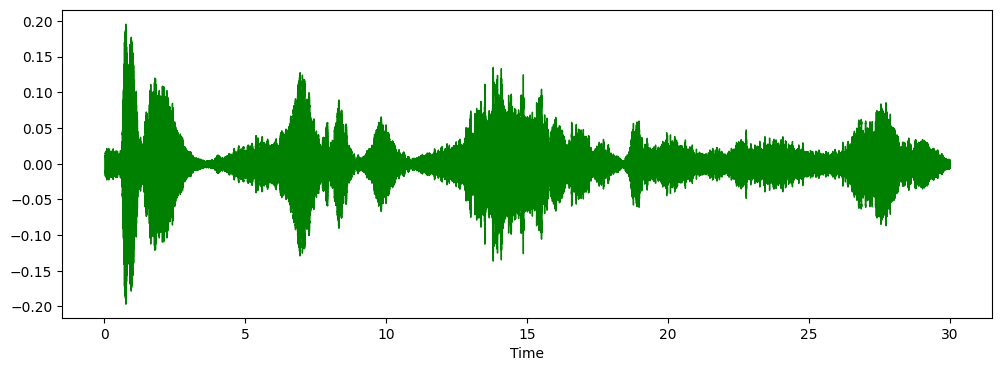

In [ ]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color = "Green")
plt.show()

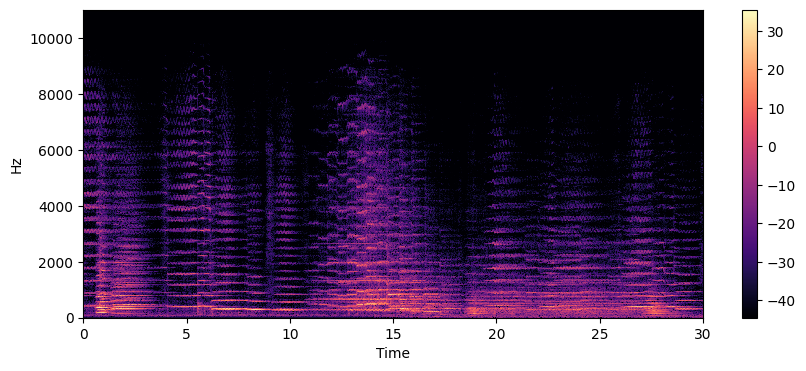

In [ ]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(10,4))
librosa.display.specshow(stft_db,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar()

In [ ]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(data, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


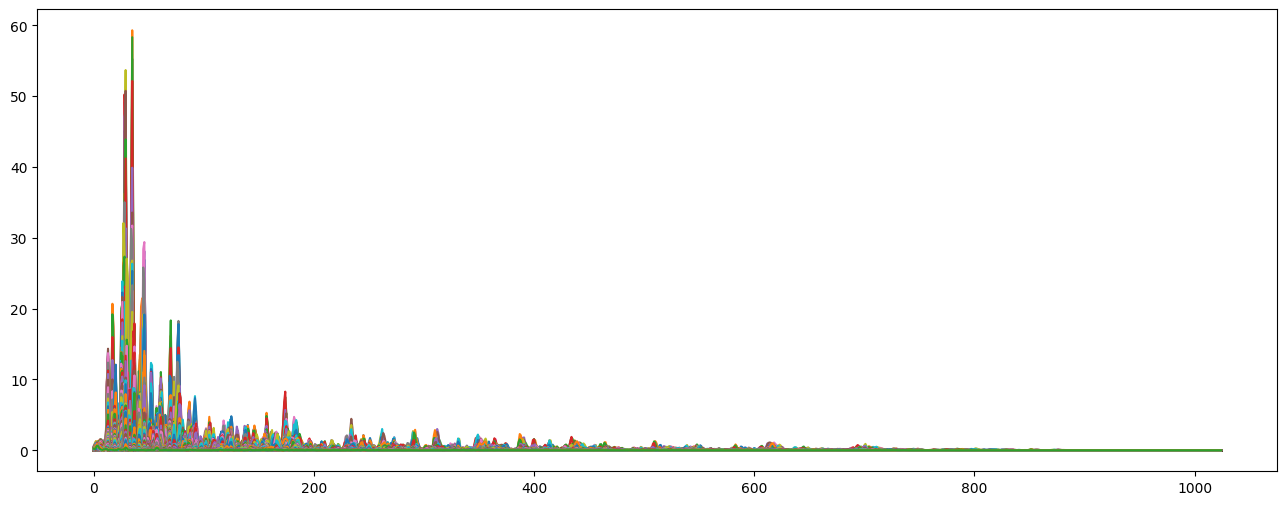

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(D);

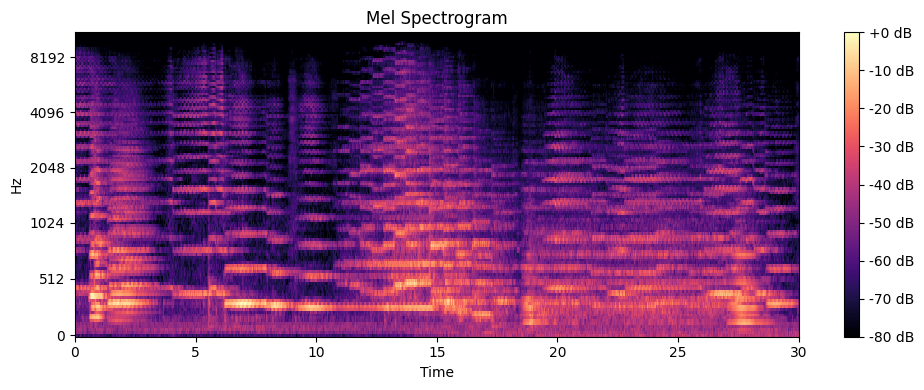

In [ ]:
data,sr=librosa.load(audio)
mel_spectrogram = librosa.feature.melspectrogram(y=data, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

# Building an neural network

In [ ]:
tf_music=tf.constant(data)
tf.shape(tf_music)
tf_music[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 0.00167847,  0.00393677,  0.00320435,  0.00332642,  0.00146484,
       -0.00418091, -0.00509644,  0.0032959 ,  0.01202393,  0.00985718],
      dtype=float32)>

In [ ]:
data[:10]

array([ 0.00167847,  0.00393677,  0.00320435,  0.00332642,  0.00146484,
       -0.00418091, -0.00509644,  0.0032959 ,  0.01202393,  0.00985718],
      dtype=float32)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/musicdata/Data/features_3_sec.csv')
df = df.iloc[0:, 1:]
df.head()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
y = df['label']  # genre variable.
X = df.drop('label', axis=1)

In [ ]:


from sklearn import preprocessing
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data.
X = pd.DataFrame(np_scaled, columns = cols)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:
X_train.shape,y_train.shape

((6993, 58), (6993,))

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Assuming X_train is a numpy array of shape (n_samples, n_features)
onehot_encoder = OneHotEncoder(sparse=False)  # Use sparse=True if you want a sparse matrix
X_train_encoded = onehot_encoder.fit_transform(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train_encoded.shape,X_train.shape,

((6993, 387067), (6993, 58))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)


# Let's use differnt deep learning model to find the best one

1.lstm- long  short term memory🧠

In [ ]:
print("X_train_encoded shape:", X_train_encoded.shape)
print("y_train_encoded shape:", y_train_encoded.shape)


X_train_encoded shape: (6993, 387067)
y_train_encoded shape: (6993,)


In [ ]:
import numpy as np
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
import tensorflow as tf
import pandas as pd

# Ensure X_train and y_train_encoded are defined and X_train is a DataFrame or array
# Convert X_train to a NumPy array if it is a DataFrame
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values

# Ensure y_train_encoded is a 1D array
y_train_encoded = np.asarray(y_train_encoded).reshape(-1)

# Reshape X_train to 3D array (samples, timesteps, features)
X_train_encoded = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Verify the shapes
print("X_train_encoded shape:", X_train_encoded.shape)  # Should be (6993, 58, 1)
print("y_train_encoded shape:", y_train_encoded.shape)  # Should be (6993,)

# Determine the number of unique classes in y_train_encoded
num_classes = len(np.unique(y_train_encoded))

# Build the model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_encoded.shape[1], X_train_encoded.shape[2]), return_sequences=True))
model.add(Dropout(0.5))  # Adding dropout
model.add(LSTM(128))
model.add(Dense(100, activation='relu'))  # Adding a dense layer
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
model.fit(X_train_encoded, y_train_encoded, epochs=500, batch_size=32, validation_split=0.3)





X_train_encoded shape: (6993, 58, 1)
y_train_encoded shape: (6993,)
Epoch 1/500
153/153 [==============================] - 10s 32ms/step - loss: 2.2308 - accuracy: 0.1410 - val_loss: 1.9390 - val_accuracy: 0.2536
Epoch 2/500
153/153 [==============================] - 3s 22ms/step - loss: 1.7912 - accuracy: 0.3144 - val_loss: 1.7301 - val_accuracy: 0.3489
Epoch 3/500
153/153 [==============================] - 3s 19ms/step - loss: 1.6812 - accuracy: 0.3730 - val_loss: 1.7035 - val_accuracy: 0.3489
Epoch 4/500
153/153 [==============================] - 3s 19ms/step - loss: 1.6204 - accuracy: 0.4000 - val_loss: 1.6347 - val_accuracy: 0.3994
Epoch 5/500
153/153 [==============================] - 5s 35ms/step - loss: 1.6067 - accuracy: 0.3990 - val_loss: 1.6682 - val_accuracy: 0.3599
Epoch 6/500
153/153 [==============================] - 5s 31ms/step - loss: 1.5508 - accuracy: 0.4247 - val_loss: 1.5942 - val_accuracy: 0.4194
Epoch 7/500
153/153 [==============================] - 4s 24ms/step

X_test_encoded shape: (2997, 58, 1)
y_test_encoded shape: (2997,)
94/94 [==============================] - 1s 5ms/step


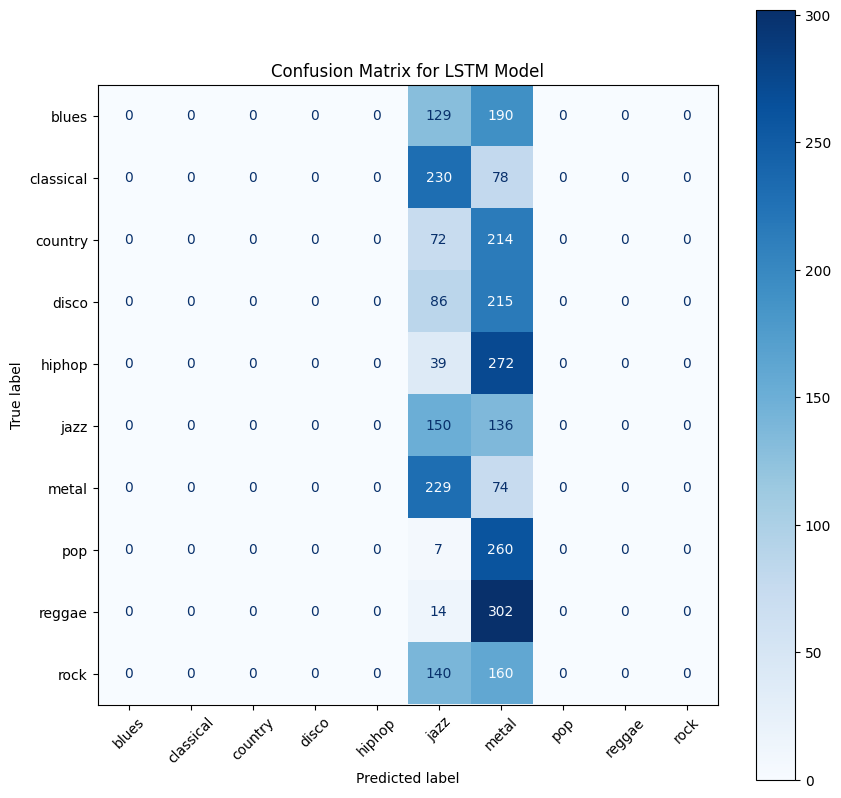

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming X_test and y_test_encoded are defined and X_test is a DataFrame or array
# Convert X_test to a NumPy array if it is a DataFrame
if isinstance(X_test, pd.DataFrame):
    X_test = X_test.values

# Ensure y_test_encoded is a 1D array
y_test_encoded = np.asarray(y_test_encoded).reshape(-1)

# Reshape X_test to 3D array (samples, timesteps, features)
X_test_encoded = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Verify the shapes
print("X_test_encoded shape:", X_test_encoded.shape)  # Should be (shape_of_test_data, 58, 1)
print("y_test_encoded shape:", y_test_encoded.shape)  # Should be (shape_of_test_data,)

# Make predictions on the test data
y_pred = np.argmax(model.predict(X_test_encoded), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot the confusion matrix with rotated x-axis labels
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)
plt.title('Confusion Matrix for LSTM Model')
plt.show()



In [ ]:
from sklearn.metrics import precision_score

# Make predictions on the test data
y_pred_probs = model.predict(X_test_encoded)
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate precision scores for each class
precision_scores = precision_score(y_test_encoded, y_pred, average=None)

# Get unique class labels from y_test_encoded
unique_classes = np.unique(y_test_encoded)

# Display precision scores for each class
for class_label, precision in zip(unique_classes, precision_scores):
    print(f'Precision for class {class_label}: {precision:.2f}')




94/94 [==============================] - 0s 2ms/step
Precision for class 0: 0.00
Precision for class 1: 0.00
Precision for class 2: 0.00
Precision for class 3: 0.00
Precision for class 4: 0.00
Precision for class 5: 0.14
Precision for class 6: 0.04
Precision for class 7: 0.00
Precision for class 8: 0.00
Precision for class 9: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# CNN



In [ ]:
import keras

In [ ]:
#The loss is calculated using sparse_categorical_crossentropy function
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs,
                     batch_size=batch_size)

In [ ]:

model2 = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),
])

model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train your model
model2_history = model2.fit(X_train, y_train_encoded, epochs=500, validation_data=(X_test, y_test_encoded))






Epoch 1/500
219/219 [==============================] - 5s 6ms/step - loss: 1.7788 - accuracy: 0.3303 - val_loss: 1.4211 - val_accuracy: 0.4434
Epoch 2/500
219/219 [==============================] - 1s 5ms/step - loss: 1.4104 - accuracy: 0.4716 - val_loss: 1.2566 - val_accuracy: 0.5279
Epoch 3/500
219/219 [==============================] - 1s 5ms/step - loss: 1.2498 - accuracy: 0.5381 - val_loss: 1.1317 - val_accuracy: 0.5859
Epoch 4/500
219/219 [==============================] - 2s 7ms/step - loss: 1.1580 - accuracy: 0.5749 - val_loss: 1.0372 - val_accuracy: 0.6286
Epoch 5/500
219/219 [==============================] - 2s 7ms/step - loss: 1.0700 - accuracy: 0.6178 - val_loss: 1.0063 - val_accuracy: 0.6373
Epoch 6/500
219/219 [==============================] - 1s 6ms/step - loss: 1.0187 - accuracy: 0.6422 - val_loss: 0.9324 - val_accuracy: 0.6613
Epoch 7/500
219/219 [==============================] - 1s 5ms/step - loss: 0.9785 - accuracy: 0.6581 - val_loss: 0.9741 - val_accuracy: 0.6480

In [ ]:
# Make predictions on the test data
y_pred_probs = model2.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Calculate precision scores for each class
precision_scores = precision_score(y_test_encoded, y_pred, average=None)

# Get unique class labels from y_test_encoded
unique_classes = np.unique(y_test_encoded)

# Display precision scores for each class
for class_label, precision in zip(unique_classes, precision_scores):
    print(f'Precision for class {class_label}: {precision:.2f}')




94/94 [==============================] - 0s 3ms/step
Precision for class 0: 0.92
Precision for class 1: 0.94
Precision for class 2: 0.88
Precision for class 3: 0.90
Precision for class 4: 0.94
Precision for class 5: 0.87
Precision for class 6: 0.96
Precision for class 7: 0.88
Precision for class 8: 0.95
Precision for class 9: 0.86


94/94 [==============================] - 0s 3ms/step


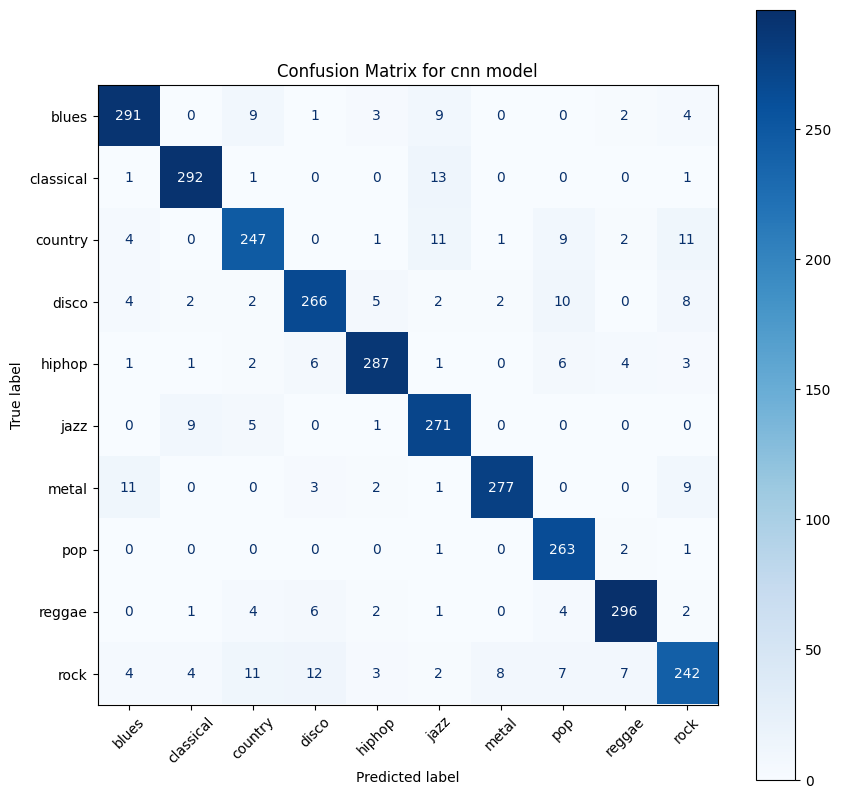

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming model2 and its history are defined as per your provided code

# Make predictions on the test data
y_pred = np.argmax(model2.predict(X_test), axis=1)

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot the confusion matrix with rotated x-axis labels
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)
plt.title('Confusion Matrix for cnn model')
plt.show()


In [ ]:


 #Print the final accuracy
print("Final Accuracy:", model2_history.history['accuracy'][-1]*100)

 #Print the final validation accuracy
print("Final Validation Accuracy:",model2_history.history['val_accuracy'][-1]*100)


Final Accuracy: 96.79679870605469
Final Validation Accuracy: 91.15782380104065


In [ ]:
import numpy as np
from keras.models import load_model

# Assuming X_test_encoded is your test set, reshaped for the LSTM model
X_test_encoded = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict with LSTM model
lstm_predictions = model.predict(X_test_encoded)  # shape: (num_samples, num_classes)

# Predict with Dense model
dense_predictions = model2.predict(X_test)  # shape: (num_samples, num_classes)

# Average the predictions
combined_predictions = (lstm_predictions + dense_predictions) / 2

# Final class prediction
final_predictions = np.argmax(combined_predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(final_predictions == y_test_encoded)
print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")




94/94 [==============================] - 0s 3ms/step
Ensemble Model Accuracy: 91.22%


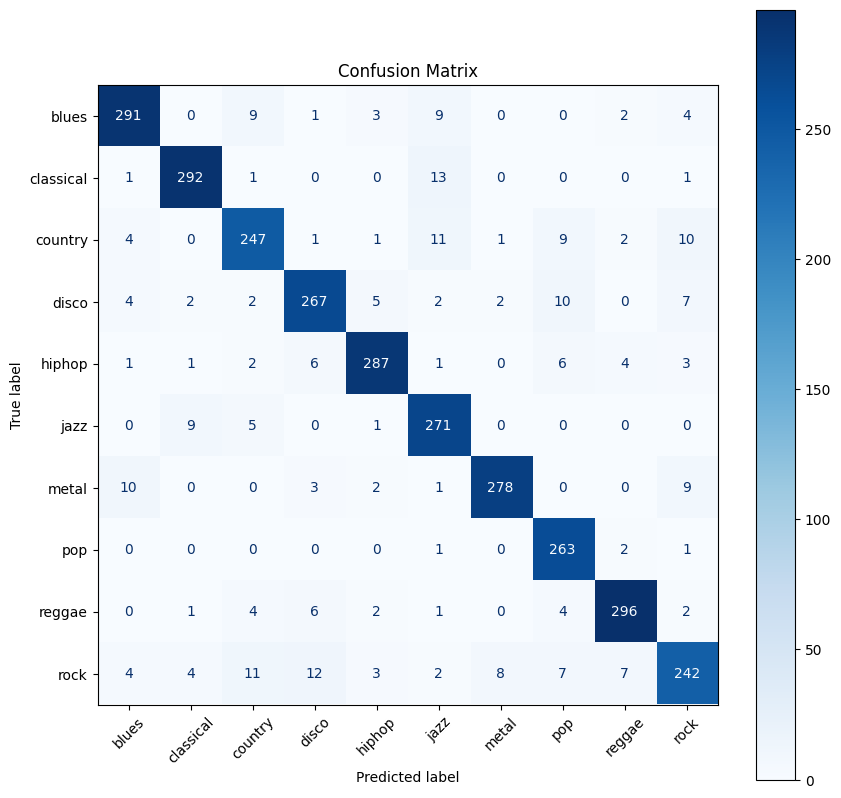

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming final_predictions and y_test_encoded are defined as per your previous steps

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, final_predictions)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot the confusion matrix with rotated x-axis labels
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the figure size as needed
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score
import numpy as np

# Assuming final_predictions and y_test_encoded are defined as per your previous steps

# Calculate precision scores for each class
precision_scores = precision_score(y_test_encoded, final_predictions, average=None)

# Get class names
class_names = label_encoder.classes_

# Display precision scores for each class
for class_name, precision in zip(class_names, precision_scores):
    print(f'Precision for class {class_name}: {precision:.2f}')


Precision for class blues: 0.92
Precision for class classical: 0.94
Precision for class country: 0.88
Precision for class disco: 0.90
Precision for class hiphop: 0.94
Precision for class jazz: 0.87
Precision for class metal: 0.96
Precision for class pop: 0.88
Precision for class reggae: 0.95
Precision for class rock: 0.87
